## Predicting Stock Price Movements 

#### import all needed libraries for this project

In [1]:
import pandas as pd
import numpy as np
from data_processing import Training_Data
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display
from ta import add_all_ta_features
from ta.utils import dropna

##### Using the alpaca historical data api to fetch stock price data in a given timeframe

In [12]:
from data_processing import Training_Data
TD = Training_Data('alpaca')
data = TD.extract_data(ticker="SPY", time_interval="1Day", start_date="2015-12-01", end_date="2022-09-30")

Alpaca successfully connected


#### view dataframe from API response

In [13]:
df=data.reset_index()
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol
0,2015-12-01 05:00:00+00:00,209.42,210.8200,209.1100,210.68,7.990598,337780,209.921410,SPY
1,2015-12-02 05:00:00+00:00,210.60,211.0000,208.2300,208.54,8.033701,367013,209.563055,SPY
2,2015-12-03 05:00:00+00:00,208.90,209.1500,204.7511,205.58,8.220694,546768,206.878936,SPY
3,2015-12-04 05:00:00+00:00,206.10,209.9700,205.9300,209.66,8.285284,556731,208.178631,SPY
4,2015-12-07 05:00:00+00:00,209.20,209.7295,207.2000,208.27,8.008716,374705,208.276128,SPY


#### figure 1:  SPY stock price since 2015-12-01

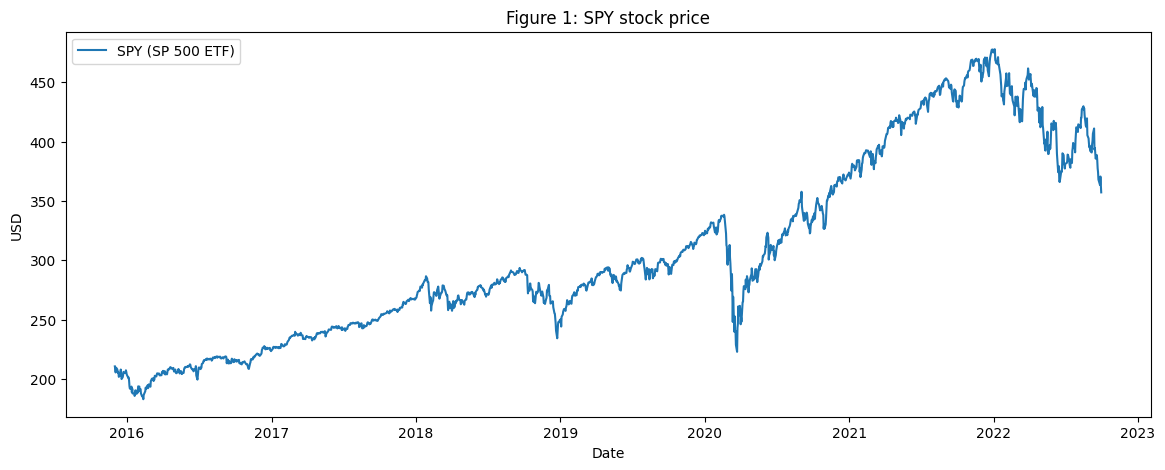

In [14]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df['timestamp'], df['close'], label='SPY (SP 500 ETF)')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Figure 1: SPY stock price')
plt.legend()
plt.show()

#### encode the timestamp with sin and cos to capture periodicity of the timeseries

In [15]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

#### apply to both month and day

In [16]:
df['month'] = df.timestamp.dt.month
df = encode(df, 'month', 12)

df['day'] = df.timestamp.dt.day
df = encode(df, 'day', 31)

In [17]:
df.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol,month,month_sin,month_cos,day,day_sin,day_cos
0,2015-12-01 05:00:00+00:00,209.42,210.8200,209.1100,210.68,7.990598,337780,209.921410,SPY,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2015-12-02 05:00:00+00:00,210.60,211.0000,208.2300,208.54,8.033701,367013,209.563055,SPY,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2015-12-03 05:00:00+00:00,208.90,209.1500,204.7511,205.58,8.220694,546768,206.878936,SPY,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2015-12-04 05:00:00+00:00,206.10,209.9700,205.9300,209.66,8.285284,556731,208.178631,SPY,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2015-12-07 05:00:00+00:00,209.20,209.7295,207.2000,208.27,8.008716,374705,208.276128,SPY,12,-2.449294e-16,1.0,7,0.988468,0.151428


In [18]:
df = df.drop(columns=['month', 'day', 'symbol', 'timestamp', 'trade_count', 'vwap'])

In [19]:
df.head()

,open,high,low,close,volume,month_sin,month_cos,day_sin,day_cos
0,209.42,210.8200,209.1100,210.68,7.990598,-2.449294e-16,1.0,0.201299,0.979530
1,210.60,211.0000,208.2300,208.54,8.033701,-2.449294e-16,1.0,0.394356,0.918958
2,208.90,209.1500,204.7511,205.58,8.220694,-2.449294e-16,1.0,0.571268,0.820763
3,206.10,209.9700,205.9300,209.66,8.285284,-2.449294e-16,1.0,0.724793,0.688967
4,209.20,209.7295,207.2000,208.27,8.008716,-2.449294e-16,1.0,0.988468,0.151428


In [20]:
# Clean NaN values
df = dropna(df)

# Add all ta features
df = add_all_ta_features(
    df, open="open", high="high", low="low", close="close", volume="volume")

/usr/local/lib/python3.9/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.9/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [23]:
df.tail()

,open,high,low,close,volume,month_sin,month_cos,day_sin,day_cos,volume_adi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
1716,366.41,370.21,363.0299,364.31,7.962518,-1.0,-1.836970e-16,-0.848644,0.528964,1739.384424,...,-2.409400,-1.581056,-0.828344,0.523500,0.449472,0.074028,381.072523,-0.989265,-0.994191,72.921018
1717,368.01,370.40,360.8700,363.38,8.024832,-1.0,-1.836970e-16,-0.724793,0.688967,1735.586733,...,-2.631134,-1.791071,-0.840062,0.554100,0.470398,0.083703,376.159862,-0.255277,-0.255603,72.479590
1718,364.44,372.30,362.6000,370.53,8.039724,-1.0,-1.836970e-16,-0.571268,0.820763,1740.692372,...,-2.627876,-1.958432,-0.669443,0.586535,0.493625,0.092910,375.297753,1.967637,1.948529,75.873362
1719,366.72,367.11,359.7000,362.79,8.049485,-1.0,-1.836970e-16,-0.394356,0.918958,1739.356223,...,-2.760285,-2.118803,-0.641482,0.614877,0.517876,0.097002,373.193414,-2.088900,-2.111026,72.199544
1720,361.93,365.91,357.0400,357.18,8.183463,-1.0,-1.836970e-16,-0.201299,0.979530,1731.431088,...,-2.954878,-2.286018,-0.668860,0.763458,0.566992,0.196466,370.426076,-1.546349,-1.558430,69.536738


In [24]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'month_sin', 'month_cos',
       'day_sin', 'day_cos', 'volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap',
       'volume_mfi', 'volume_nvi', 'volatility_bbm', 'volatility_bbh',
       'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_di

Text(0.5, 1.0, 'Time of day signal')

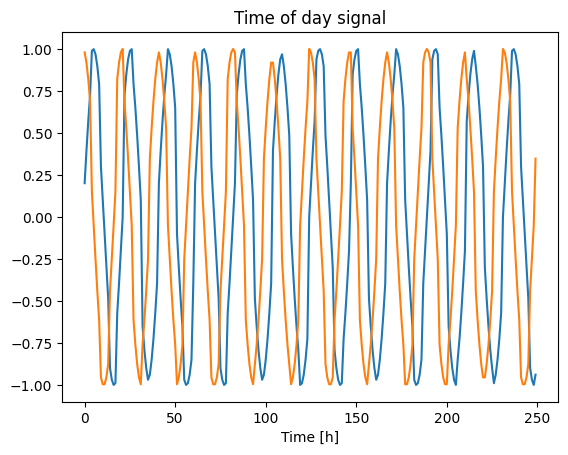

In [83]:
plt.plot(np.array(df['day_sin'])[:250])
plt.plot(np.array(df['day_cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

Text(0.5, 1.0, 'Time of month signal')

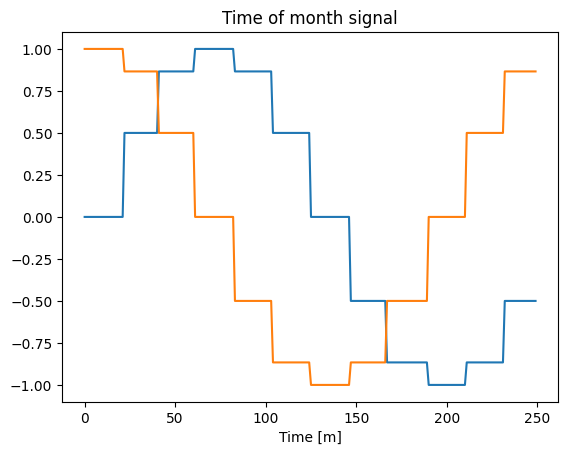

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(np.array(df['month_sin'])[:250])
plt.plot(np.array(df['month_cos'])[:250])
plt.xlabel('Time [m]')
plt.title('Time of month signal')

In [85]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,1721.0,306.802127,78.543079,182.380000,245.200000,2.858300e+02,371.930000,479.260000
high,1721.0,308.509027,79.090828,184.100000,247.000000,2.873100e+02,376.525000,479.980000
low,1721.0,304.889832,77.873651,181.020000,244.160000,2.844000e+02,370.590000,476.060000
close,1721.0,306.816793,78.506804,183.030000,246.010000,2.858400e+02,372.240000,477.710000
volume,1721.0,7.902104,0.186100,7.312559,7.763719,7.879817e+00,8.011356,8.630366
trade_count,1721.0,5.567315,0.248481,4.925853,5.386898,5.531135e+00,5.709427,6.665034
vwap,1721.0,306.755949,78.488247,182.856359,245.630362,2.857831e+02,372.205316,477.868706
month_sin,1721.0,0.006957,0.708305,-1.000000,-0.866025,1.224647e-16,0.866025,1.000000
month_cos,1721.0,-0.026505,0.705786,-1.000000,-0.866025,-1.836970e-16,0.500000,1.000000
day_sin,1721.0,0.006715,0.714237,-0.998717,-0.724793,-2.449294e-16,0.724793,0.998717


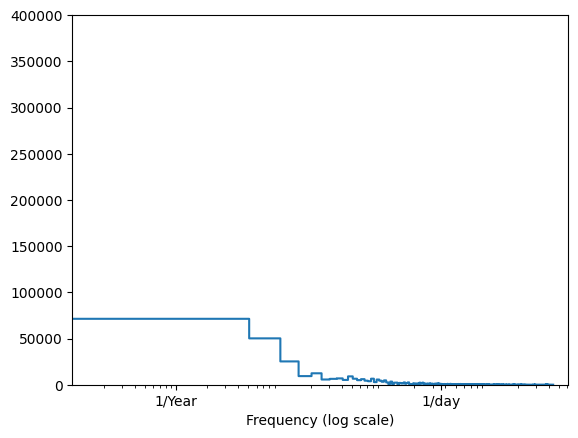

In [86]:
import tensorflow as tf
fft = tf.signal.rfft(df['close'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['close'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [87]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [88]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

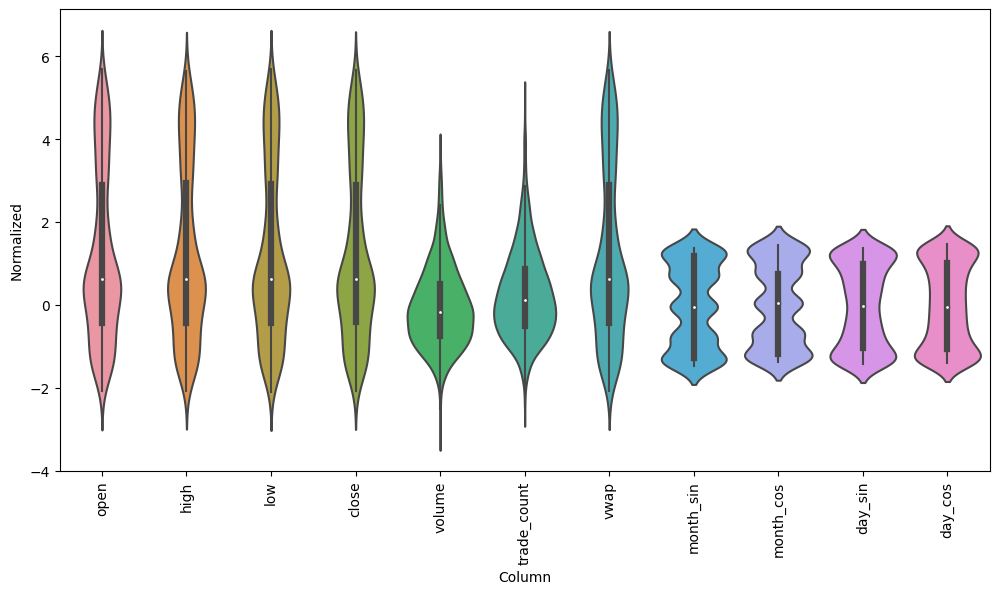

In [89]:
import seaborn as sns
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [90]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [91]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['close'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['close']

In [92]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [93]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 11)
Inputs shape: (3, 6, 11)
Labels shape: (3, 1, 1)


In [94]:
w2.example = example_inputs, example_labels

In [95]:
def plot(self, model=None, plot_col='close', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [d]')

WindowGenerator.plot = plot

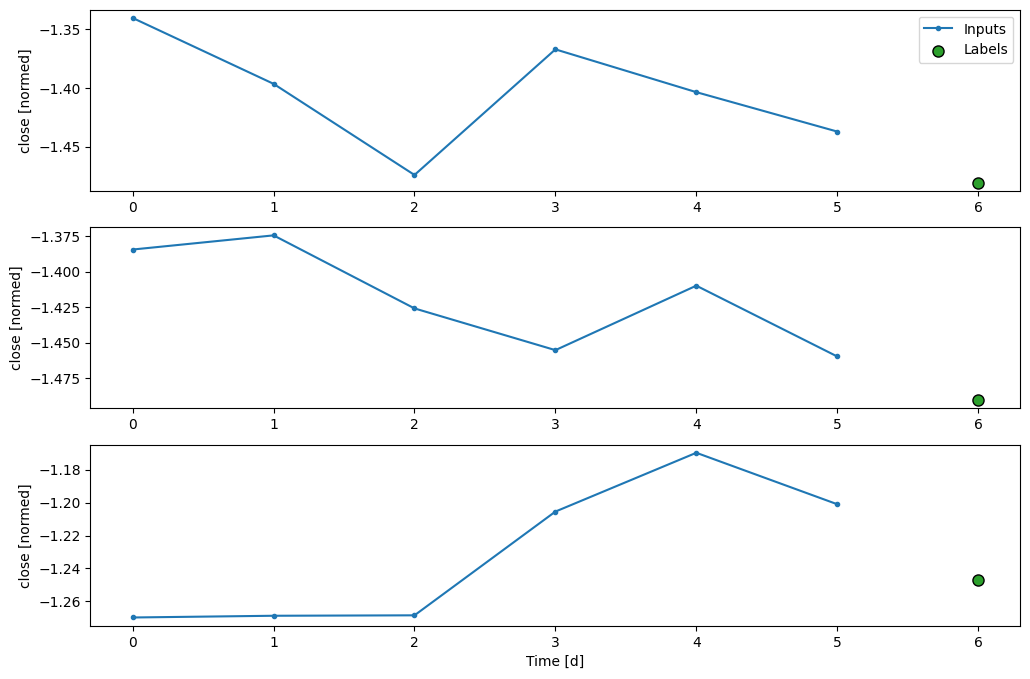

In [96]:
w2.plot()

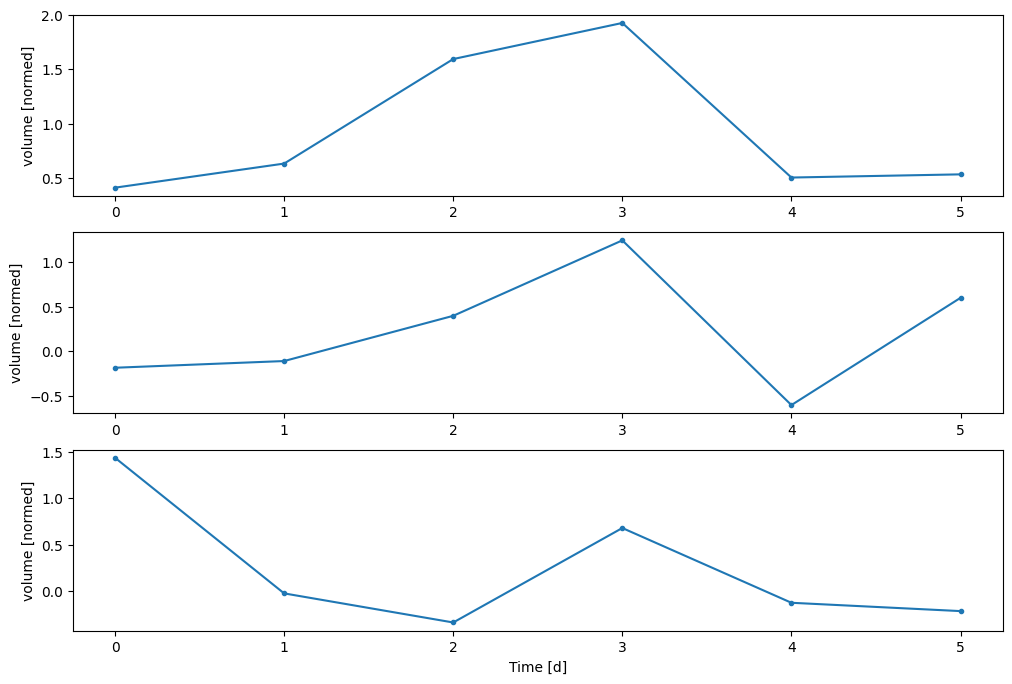

In [98]:
w2.plot(plot_col='volume')

In [100]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [101]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [102]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 11), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [103]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 11)
Labels shape (batch, time, features): (32, 1, 1)


In [104]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['close'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['close']

In [148]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [149]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 11)
Output shape: (32, 1, 1)


In [150]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [151]:
import IPython
import IPython.display
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance = {}
performance = {}
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

11/11 [==============================] - 0s 2ms/step - loss: 0.0372 - mean_absolute_error: 0.1526


In [152]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['close'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['close']

In [120]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [121]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['close'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['close']

In [122]:
baseline = Baseline(label_index=column_indices['close'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

11/11 [==============================] - 0s 1ms/step - loss: 0.0089 - mean_absolute_error: 0.0725


In [123]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 11)
Output shape: (32, 24, 1)


In [124]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 11)
Output shape: (32, 1, 1)


In [125]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 11)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [153]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['close'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['close']

In [133]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 11)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


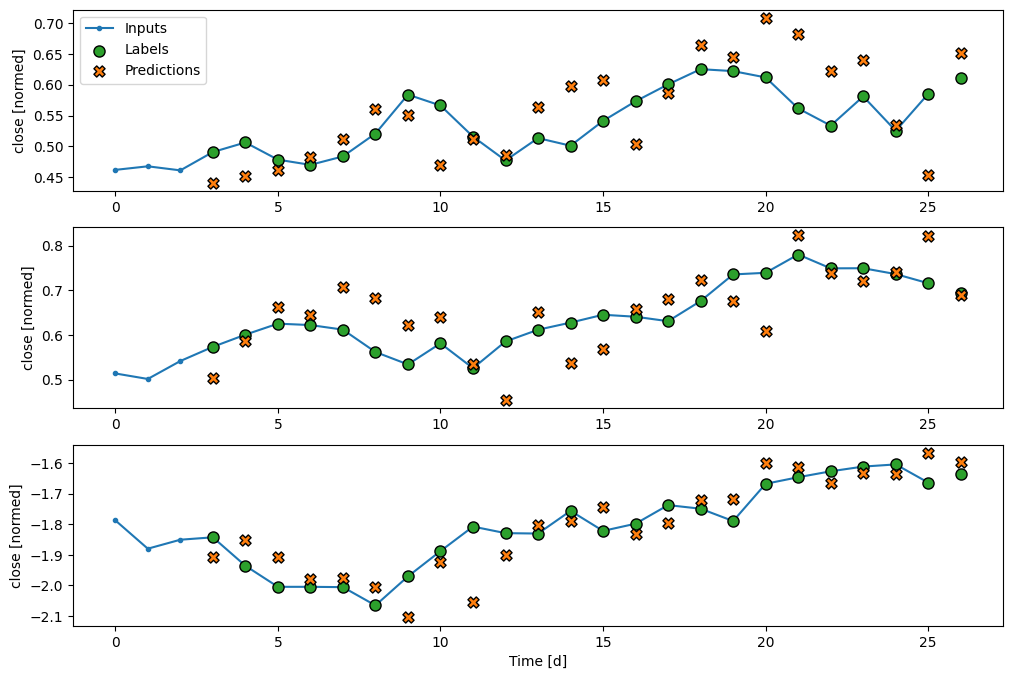

In [154]:
wide_conv_window.plot(conv_model)

In [144]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [145]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 11)
Output shape: (32, 24, 1)


In [146]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

10/10 [==============================] - 0s 11ms/step - loss: 1.9932 - mean_absolute_error: 1.2309


2022-10-02 19:41:20.558950: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at strided_slice_op.cc:108 : INVALID_ARGUMENT: Index out of range using input dim 2; input has only 2 dims


InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

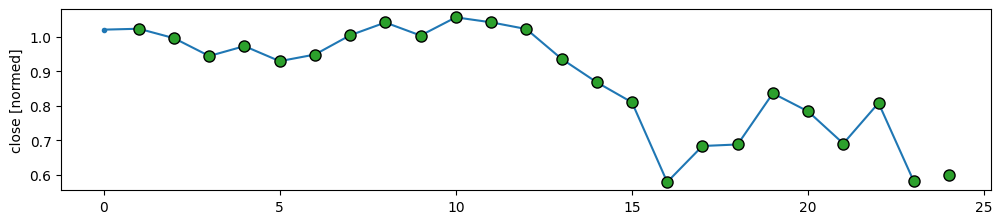

In [143]:
wide_window.plot(lstm_model)

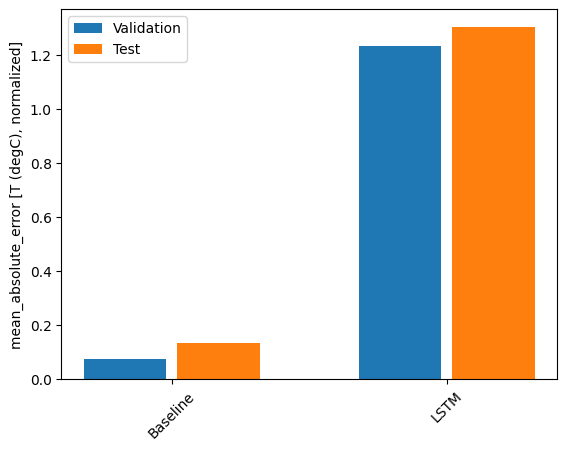

In [147]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()